In [1]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import time
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from umap import UMAP
from google.colab import files
from sklearn import preprocessing

In [3]:
data = pd.read_csv('/content/sample_data/mnist_test.csv', delimiter=',')

In [4]:
data

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = data.rename(columns={'7': 'label'})
D = data.drop(['label'], axis = 1)
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)
print(D)

        0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.658  0.659  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
9994  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
9995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
9996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
9997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
9998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

      0.660  0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0       0.0 

t-SNE

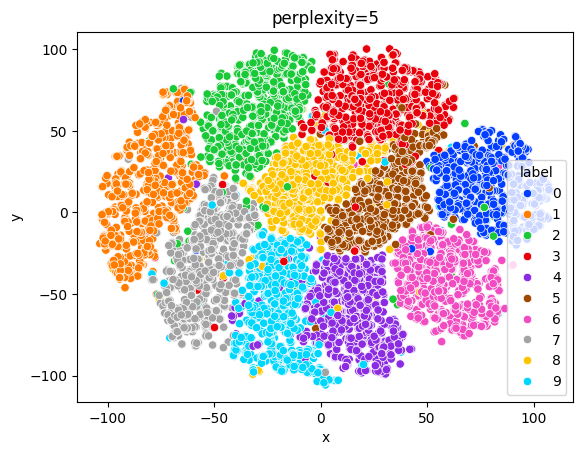

Время работы алгоритма:  110.06899118423462


In [7]:
time_start = time.time()
T = TSNE(n_components=2, perplexity=5, random_state=123)
TSNE_features = T.fit_transform(D)
DATA = data.copy()
DATA['x'] = TSNE_features[:, 0]
DATA['y'] = TSNE_features[:, 1]
fig = plt.figure()
plt.title('perplexity=5')
sns.scatterplot(x='x', y='y', data=DATA, hue=data['label'], palette='bright')
plt.show()
print('Время работы алгоритма: ', format(time.time()-time_start))

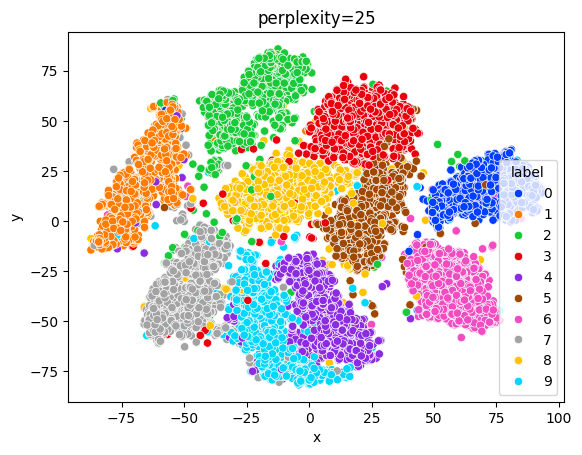

Время работы алгоритма:  177.83828735351562


In [8]:
time_start = time.time()
T = TSNE(n_components=2, perplexity=25, random_state=123)
TSNE_features = T.fit_transform(D)
DATA = data.copy()
DATA['x'] = TSNE_features[:, 0]
DATA['y'] = TSNE_features[:, 1]
fig = plt.figure()
plt.title('perplexity=25')
sns.scatterplot(x='x', y='y', data=DATA, hue=data['label'], palette='bright')
plt.show()
print('Время работы алгоритма: ', format(time.time()-time_start))

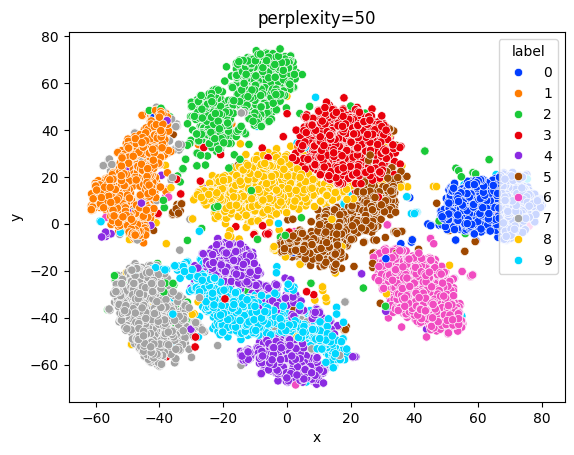

Время работы алгоритма:  147.51399636268616


In [9]:
time_start = time.time()
T = TSNE(n_components=2, perplexity=50, random_state=123)
TSNE_features = T.fit_transform(D)
DATA = data.copy()
DATA['x'] = TSNE_features[:, 0]
DATA['y'] = TSNE_features[:, 1]
fig = plt.figure()
plt.title('perplexity=50')
sns.scatterplot(x='x', y='y', data=DATA, hue=data['label'], palette='bright')
plt.show()
print('Время работы алгоритма: ', format(time.time()-time_start))

UMAP

In [11]:
D = data.drop(['label'], axis = 1)
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)

In [12]:
n_n = (5, 25, 60)
m_d = (0.1, 0.6)

n_neighbors = 5 , min_dist = 0.1 , время работы: 39.16 сек


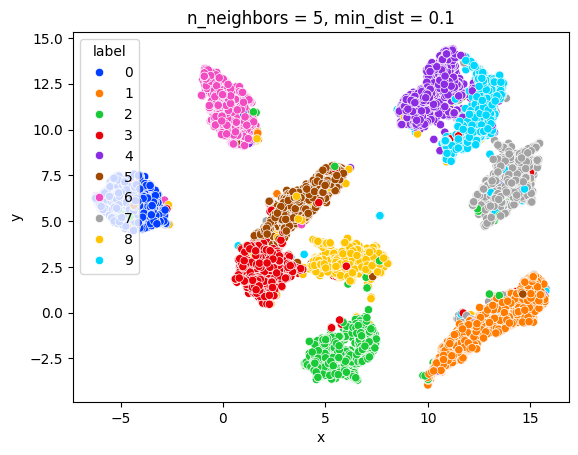

n_neighbors = 5 , min_dist = 0.6 , время работы: 9.24 сек


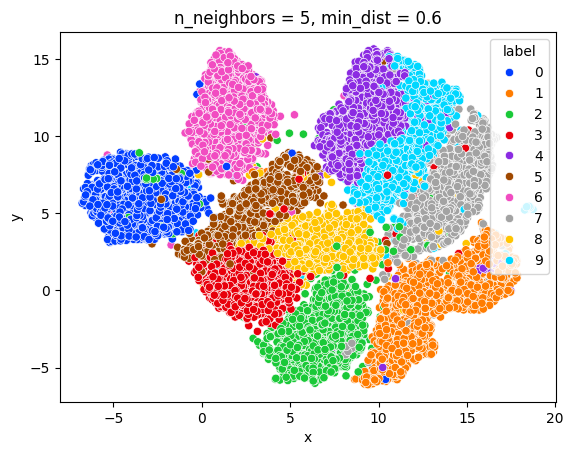

n_neighbors = 25 , min_dist = 0.1 , время работы: 21.09 сек


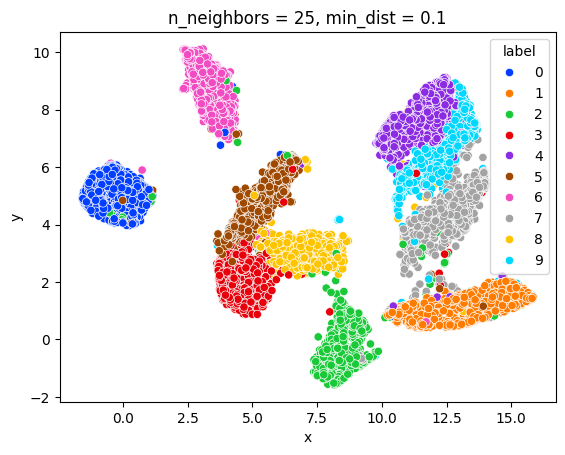

n_neighbors = 25 , min_dist = 0.6 , время работы: 20.38 сек


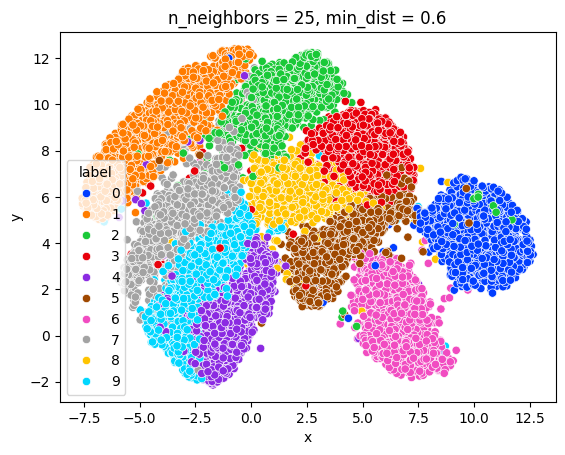

n_neighbors = 60 , min_dist = 0.1 , время работы: 31.71 сек


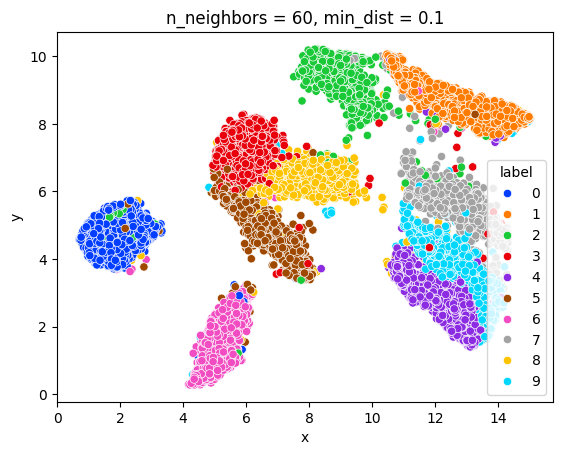

n_neighbors = 60 , min_dist = 0.6 , время работы: 30.76 сек


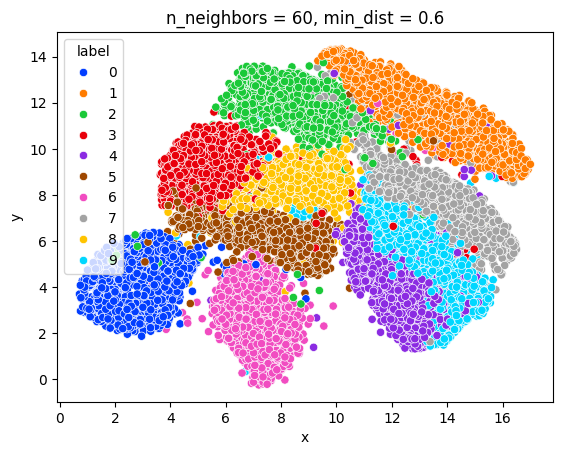

In [13]:
for n_neighbors in n_n:
    for min_dist in m_d:
        start_time = time.time()
        um = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist)
        umap_features = um.fit_transform(D)
        DATA = data.copy()
        DATA['x'] = umap_features[:, 0]
        DATA['y'] = umap_features[:, 1]
        fig = plt.figure()
        plt.title('n_neighbors = ' + str(n_neighbors) + ', min_dist = ' + str(min_dist))
        sns.scatterplot(x='x', y='y', data=DATA, hue=data['label'], palette='bright')
        print('n_neighbors =', n_neighbors, ', min_dist =', min_dist, ', время работы: %.2f сек' % (time.time() - start_time))
        plt.show()
